In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('cleaned_train_data.csv')

In [3]:
events = pd.read_csv('add_event.csv')
offers = pd.read_csv('offer_metadata.csv', sep='\t', engine='python', on_bad_lines='skip')

In [4]:
test = pd.read_csv('test_data.xls.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 372 entries, id1 to f366
dtypes: float64(355), int64(5), object(12)
memory usage: 2.1+ GB


In [6]:
#merging offer
train = train.merge(offers, on='id3', how='left')
test = test.merge(offers, on='id3', how='left')

In [7]:
#merging events
train = train.merge(events, on=['id2', 'id3', 'id4'], how='left')
test = test.merge(events, on=['id2', 'id3', 'id4'], how='left')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 385 entries, id1 to id7
dtypes: float64(361), int64(5), object(19)
memory usage: 2.2+ GB


In [9]:
null_cols = [col for col in train.columns if train[col].isnull().all()]
print("Columns that are completely null:")
print(null_cols)
print(f"\nCount of completely null columns: {len(null_cols)}")

Columns that are completely null:
['f112', 'f122', 'f135', 'f136', 'f377', 'id11', 'id6', 'id7']

Count of completely null columns: 8


In [10]:
null_summary = train.isnull().mean().sort_values(ascending=False)
print("Top 20 columns with most missing values:")
print(null_summary.head(20))

Top 20 columns with most missing values:
id7     1.000000
id6     1.000000
f122    1.000000
f112    1.000000
f135    1.000000
f136    1.000000
id11    1.000000
f377    1.000000
f80     0.999899
f360    0.999699
f120    0.999671
f34     0.999475
f18     0.999096
f19     0.999096
f14     0.999096
f21     0.999096
f17     0.999096
f16     0.999096
f20     0.999096
f13     0.999096
dtype: float64


In [11]:
example_missing = train[train.isnull().any(axis=1)].head()
print(example_missing)

                                               id1      id2        id3  \
0  1366776_189706075_16-23_2023-11-02 22:22:00.042  1366776  189706075   
1      1366776_89227_16-23_2023-11-01 23:51:24.999  1366776      89227   
2      1366776_35046_16-23_2023-11-01 00:30:59.797  1366776      35046   
3    1366776_6275451_16-23_2023-11-02 22:21:32.261  1366776    6275451   
4      1366776_78053_16-23_2023-11-02 22:21:34.799  1366776      78053   

                       id4         id5  y   f1  f2  f3  f4  ...  f377  id10  \
0  2023-11-02 22:22:00.042  2023-11-02  0  1.0 NaN NaN NaN  ...   NaN   NaN   
1  2023-11-01 23:51:24.999  2023-11-01  0  1.0 NaN NaN NaN  ...   NaN   1.0   
2  2023-11-01 00:30:59.797  2023-11-01  0  1.0 NaN NaN NaN  ...   NaN   1.0   
3  2023-11-02 22:21:32.261  2023-11-02  0  1.0 NaN NaN NaN  ...   NaN   1.0   
4  2023-11-02 22:21:34.799  2023-11-02  0  1.0 NaN NaN NaN  ...   NaN   NaN   

   id11                                   f378                    f374  \
0   Na

In [12]:
num_cols = train.select_dtypes(include=np.number).columns

In [13]:
outlier_report = {}
for col in num_cols:
    desc = train[col].describe(percentiles=[0.01, 0.05, 0.95, 0.99])
    outlier_report[col] = {
        "min": desc["min"],
        "1st_pct": desc["1%"],
        "5th_pct": desc["5%"],
        "95th_pct": desc["95%"],
        "99th_pct": desc["99%"],
        "max": desc["max"],
        "missing_pct": train[col].isnull().mean()
    }

for col, vals in list(outlier_report.items())[:10]:  # first 10 as example
    print(f"{col}: {vals}")

id2: {'min': np.float64(1000043.0), '1st_pct': np.float64(1010283.45), '5th_pct': np.float64(1049780.0), '95th_pct': np.float64(1864317.0), '99th_pct': np.float64(1901675.0), 'max': np.float64(1910568.0), 'missing_pct': np.float64(0.0)}
id3: {'min': np.float64(1185.0), '1st_pct': np.float64(1525.0), '5th_pct': np.float64(13209.0), '95th_pct': np.float64(88456737.0), '99th_pct': np.float64(667725438.0), 'max': np.float64(876665835.0), 'missing_pct': np.float64(0.0)}
y: {'min': np.float64(0.0), '1st_pct': np.float64(0.0), '5th_pct': np.float64(0.0), '95th_pct': np.float64(0.0), '99th_pct': np.float64(1.0), 'max': np.float64(1.0), 'missing_pct': np.float64(0.0)}
f1: {'min': np.float64(1.0), '1st_pct': np.float64(1.0), '5th_pct': np.float64(5.0), '95th_pct': np.float64(82.0), '99th_pct': np.float64(96.0), 'max': np.float64(100.0), 'missing_pct': np.float64(0.6383809162723784)}
f2: {'min': np.float64(1.0), '1st_pct': np.float64(1.0), '5th_pct': np.float64(4.0), '95th_pct': np.float64(75.0),

In [14]:
cat_cols = train.select_dtypes(include="object").columns

for col in cat_cols:
    print(f"Column: {col}")
    print(f"Unique values in train: {train[col].nunique()}")
    print(f"Sample values: {train[col].dropna().unique()[:5]}")
    print("-" * 30)


Column: id1
Unique values in train: 770164
Sample values: ['1366776_189706075_16-23_2023-11-02 22:22:00.042'
 '1366776_89227_16-23_2023-11-01 23:51:24.999'
 '1366776_35046_16-23_2023-11-01 00:30:59.797'
 '1366776_6275451_16-23_2023-11-02 22:21:32.261'
 '1366776_78053_16-23_2023-11-02 22:21:34.799']
------------------------------
Column: id4
Unique values in train: 763371
Sample values: ['2023-11-02 22:22:00.042' '2023-11-01 23:51:24.999'
 '2023-11-01 00:30:59.797' '2023-11-02 22:21:32.261'
 '2023-11-02 22:21:34.799']
------------------------------
Column: id5
Unique values in train: 3
Sample values: ['2023-11-02' '2023-11-01' '2023-11-03']
------------------------------
Column: f42
Unique values in train: 4
Sample values: ['R' 'G' 'P' 'S']
------------------------------
Column: f50
Unique values in train: 2
Sample values: ['Y' 'N']
------------------------------
Column: f52
Unique values in train: 2
Sample values: ['N' 'Y']
------------------------------
Column: f53
Unique values in tr

In [15]:
id_columns = [c for c in train.columns if "id" in c.lower() or c.startswith("Unnamed")]
print("ID/Index-related columns present:")
print(id_columns)

# Check if any ID columns have unique or near-unique values
for c in id_columns:
    print(f"{c}: unique={train[c].nunique()}, missing={train[c].isnull().sum()}")

ID/Index-related columns present:
['id1', 'id2', 'id3', 'id4', 'id5', 'id9', 'id10', 'id11', 'id8', 'id12', 'id13,,,', 'id6', 'id7']
id1: unique=770164, missing=0
id2: unique=46550, missing=0
id3: unique=757, missing=0
id4: unique=763371, missing=0
id5: unique=3, missing=0
id9: unique=400, missing=202372
id10: unique=2, missing=202372
id11: unique=0, missing=770164
id8: unique=136, missing=203624
id12: unique=104, missing=202372
id13,,,: unique=115, missing=202372
id6: unique=0, missing=770164
id7: unique=0, missing=770164


In [16]:
decay_cols = [col for col in train.columns if "decay" in col or "ratio" in col]
print("Decay/Ratio columns:")
print(decay_cols)

Decay/Ratio columns:
[]


In [18]:
print("Shape of DataFrame:", train.shape)
print("Shape of DataFrame:", test.shape)
print(f"Total memory usage (MB): {train.memory_usage(deep=True).sum() / 1024**2:.2f}")

Shape of DataFrame: (770164, 385)
Shape of DataFrame: (369301, 384)
Total memory usage (MB): 2872.03


In [19]:
null_drop = ['f112', 'f122', 'f135', 'f136', 'f377', 'id11', 'id6', 'id7']
train = train.drop(columns=null_drop)
test = test.drop(columns=[col for col in null_drop if col in test.columns])

In [20]:
# Drop highly sparse columns automatically (other than engineered, high-impact business features)
thresh = 0.8
sparse_cols = train.columns[train.isnull().mean() > thresh].tolist()
sparse_cols = [c for c in sparse_cols if c not in ['id1', 'id2', 'id3', 'id4', 'id5']]
train = train.drop(columns=sparse_cols)
test = test.drop(columns=[col for col in sparse_cols if col in test.columns])

In [21]:
sparse_cols

['f3',
 'f4',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f33',
 'f34',
 'f36',
 'f37',
 'f64',
 'f66',
 'f70',
 'f79',
 'f80',
 'f81',
 'f84',
 'f88',
 'f92',
 'f114',
 'f117',
 'f118',
 'f120',
 'f121',
 'f154',
 'f176',
 'f189',
 'f205',
 'f220',
 'f221',
 'f360',
 'f376']

In [22]:
from sklearn.preprocessing import LabelEncoder

num_cols = train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train.select_dtypes(include='object').columns

for col in num_cols:
    if col not in ['y']:  # Don't impute target!
        median_val = train[col].median()
        train[col] = train[col].fillna(median_val)
        if col in test.columns:
            test[col] = test[col].fillna(median_val)

for col in cat_cols:
    train[col] = train[col].fillna('missing')
    if col in test.columns:
        test[col] = test[col].fillna('missing')

In [23]:
id_columns = ['id1', 'id2', 'id3','id5']  # adjust as needed; don't encode IDs!
target_col = 'y'

# Drop id columns and target for feature matrix
X = train.drop(columns=[*id_columns, target_col], errors='ignore')
X_test = test.drop(columns=id_columns, errors='ignore')

# Find object (categorical) columns to encode
cat_cols = X.select_dtypes(include='object').columns

# Fit LabelEncoder on the union of train and test for each categorical col
for col in cat_cols:
    combined_values = pd.concat([X[col], X_test[col]], axis=0).astype(str)
    le = LabelEncoder()
    le.fit(combined_values)
    X[col] = le.transform(X[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

In [24]:
num_cols = X.select_dtypes(include=[np.number]).columns
for col in num_cols:
    if col not in ['target']:  # don't cap the target/label
        lower = X[col].quantile(0.01)
        upper = X[col].quantile(0.99)
        X[col] = X[col].clip(lower, upper)
        # Also do it for test, but use training quantiles for consistency
        if col in X_test.columns:
            X_test[col] = X_test[col].clip(lower, upper)

In [25]:
feature_cols = [col for col in X.columns if col != 'target']

In [26]:
from sklearn.model_selection import train_test_split

y = train['y']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 335 entries, id4 to id13,,,
dtypes: float64(319), int64(16)
memory usage: 1.9 GB


In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369301 entries, 0 to 369300
Columns: 335 entries, id4 to id13,,,
dtypes: float64(319), int64(16)
memory usage: 943.9 MB


In [29]:
possible_interest_cols = ['f1','f2','f5','f6','f7','f8','f9','f10','f11','f12', 'f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27']
interest_cols = [col for col in possible_interest_cols if col in X.columns]
interest_cols = [c for c in interest_cols if c in X_test.columns]

In [30]:
# INTEREST SCORE CLUBBING
X['interest_mean'] = X[interest_cols].mean(axis=1)
X['interest_max'] = X[interest_cols].max(axis=1)
X['interest_min'] = X[interest_cols].min(axis=1)
X['interest_std'] = X[interest_cols].std(axis=1)
X['interest_sum'] = X[interest_cols].sum(axis=1)
X['interest_delta_coffee_airlines'] = X['f2'] - X['f9']  # example: coffee vs airlines interest

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\2198707548.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['interest_mean'] = X[interest_cols].mean(axis=1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\2198707548.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['interest_max'] = X[interest_cols].max(axis=1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\2198707548.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

In [31]:
X_test['interest_mean']  = X_test[interest_cols].mean(axis=1)
X_test['interest_max']   = X_test[interest_cols].max(axis=1)
X_test['interest_min']   = X_test[interest_cols].min(axis=1)
X_test['interest_std']   = X_test[interest_cols].std(axis=1)
X_test['interest_sum']   = X_test[interest_cols].sum(axis=1)
X_test['interest_delta_coffee_airlines'] = X_test['f2'] - X_test['f9']

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\504204859.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['interest_mean']  = X_test[interest_cols].mean(axis=1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\504204859.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['interest_max']   = X_test[interest_cols].max(axis=1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\504204859.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 341 entries, id4 to interest_delta_coffee_airlines
dtypes: float64(325), int64(16)
memory usage: 2.0 GB


In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369301 entries, 0 to 369300
Columns: 341 entries, id4 to interest_delta_coffee_airlines
dtypes: float64(325), int64(16)
memory usage: 960.8 MB


In [34]:
# TIME-BASED RATIOS & TRENDS
X['total_time_ratio'] = X['f59'] / (X['f68'] + 1)  # total time 30d / 180d
X['acq_time_ratio'] = X['f60'] / (X['f69'] + 1)
X['travel_time_ratio'] = X['f65'] / (X['f74'] + 1)

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\2968614027.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['total_time_ratio'] = X['f59'] / (X['f68'] + 1)  # total time 30d / 180d
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\2968614027.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['acq_time_ratio'] = X['f60'] / (X['f69'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\2968614027.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

In [35]:
# FOR TEST
X_test['total_time_ratio'] = X_test['f59'] / (X_test['f68'] + 1)  # total time 30d / 180d
X_test['acq_time_ratio'] = X_test['f60'] / (X_test['f69'] + 1)
X_test['travel_time_ratio'] = X_test['f65'] / (X_test['f74'] + 1)

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\4186668515.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['total_time_ratio'] = X_test['f59'] / (X_test['f68'] + 1)  # total time 30d / 180d
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\4186668515.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['acq_time_ratio'] = X_test['f60'] / (X_test['f69'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\4186668515.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

In [36]:
Column_to_drop =['f59','f68','f60','f69','f65','f74']

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 344 entries, id4 to travel_time_ratio
dtypes: float64(328), int64(16)
memory usage: 2.0 GB


In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369301 entries, 0 to 369300
Columns: 344 entries, id4 to travel_time_ratio
dtypes: float64(328), int64(16)
memory usage: 969.2 MB


In [39]:
# IMPRESSIONS/CLICKS/CTR VELOCITY
X['ctr_1d_3d_ratio'] = X['f310'] / (X['f311'] + 1)
X['ctr_7d_30d_ratio'] = X['f312'] / (X['f314'] + 1)
X['clicks_30d_7d_ratio'] = X['f319'] / (X['f317'] + 1)
X['imps_30d_7d_ratio'] = X['f324'] / (X['f322'] + 1)

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3445344186.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['ctr_1d_3d_ratio'] = X['f310'] / (X['f311'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3445344186.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['ctr_7d_30d_ratio'] = X['f312'] / (X['f314'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3445344186.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

In [40]:
# FOR TEST
X_test['ctr_1d_3d_ratio'] = X_test['f310'] / (X_test['f311'] + 1)
X_test['ctr_7d_30d_ratio'] = X_test['f312'] / (X_test['f314'] + 1)
X_test['clicks_30d_7d_ratio'] = X_test['f319'] / (X_test['f317'] + 1)
X_test['imps_30d_7d_ratio'] = X_test['f324'] / (X_test['f322'] + 1)

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3962128969.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['ctr_1d_3d_ratio'] = X_test['f310'] / (X_test['f311'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3962128969.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['ctr_7d_30d_ratio'] = X_test['f312'] / (X_test['f314'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3962128969.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

In [41]:
Column_to_drop.extend(['f310', 'f311', 'f312', 'f314', 'f319', 'f317', 'f324', 'f322'])

In [42]:
Column_to_drop

['f59',
 'f68',
 'f60',
 'f69',
 'f65',
 'f74',
 'f310',
 'f311',
 'f312',
 'f314',
 'f319',
 'f317',
 'f324',
 'f322']

In [43]:
# SPEND/TXN CHANGE & COMBINED FIELDS
#spend_cols_30d = ['f39','f40','f41']
#spend_cols_180d = ['f163','f164','f169']  # match columns based on dictionary
X['lifestyle_spend_change'] = (X['f39'] - X['f163']) / (X['f163'] + 1)
X['electronics_spend_change'] = (X['f40'] - X['f164']) / (X['f164'] + 1)
X['restaurant_spend_change'] = (X['f41'] - X['f179']) / (X['f179'] + 1)
X['retail_shopping_spend_sum'] = X['f158'] + X['f169']  # retail+shopping

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\2926993021.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['lifestyle_spend_change'] = (X['f39'] - X['f163']) / (X['f163'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\2926993021.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['electronics_spend_change'] = (X['f40'] - X['f164']) / (X['f164'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\2926993021.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

In [44]:
# FOR TEST
spend_cols_30d = ['f39','f40','f41']
spend_cols_180d = ['f163','f164','f169']  # match columns based on dictionary
X_test['lifestyle_spend_change'] = (X_test['f39'] - X_test['f163']) / (X_test['f163'] + 1)
X_test['electronics_spend_change'] = (X_test['f40'] - X_test['f164']) / (X_test['f164'] + 1)
X_test['restaurant_spend_change'] = (X_test['f41'] - X_test['f179']) / (X_test['f179'] + 1)
X_test['retail_shopping_spend_sum'] = X_test['f158'] + X_test['f169']  # retail+shopping

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1948751704.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['lifestyle_spend_change'] = (X_test['f39'] - X_test['f163']) / (X_test['f163'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1948751704.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['electronics_spend_change'] = (X_test['f40'] - X_test['f164']) / (X_test['f164'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1948751704.py:6: PerformanceWarning: DataFrame is highly fragmented.  This

In [45]:
Column_to_drop.extend(['f39','f40','f41','f163','f164','f169','f158','f179'])

In [46]:
print(sorted(list(X.columns)))

['acq_time_ratio', 'clicks_30d_7d_ratio', 'ctr_1d_3d_ratio', 'ctr_7d_30d_ratio', 'electronics_spend_change', 'f1', 'f10', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f11', 'f110', 'f111', 'f113', 'f115', 'f116', 'f119', 'f12', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f2', 'f200', 'f201', 'f202', 'f203', 'f204', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f

In [47]:
main_offer_cat_cols = [f'f{idx}' for idx in range(226, 233) if f'f{idx}' in X.columns]
X['main_offer_cat_sum'] = X[main_offer_cat_cols].sum(axis=1)
X['main_offer_cat_argmax'] = X[main_offer_cat_cols].idxmax(axis=1).str.extract('(\d+)').astype(int)  # index of main category

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\951392489.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['main_offer_cat_sum'] = X[main_offer_cat_cols].sum(axis=1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\951392489.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['main_offer_cat_argmax'] = X[main_offer_cat_cols].idxmax(axis=1).str.extract('(\d+)').astype(int)  # index of main category


In [48]:
#FOR TEST
main_offer_cat_cols = [f'f{idx}' for idx in range(226, 233) if f'f{idx}' in X_test.columns]
X_test['main_offer_cat_sum'] = X_test[main_offer_cat_cols].sum(axis=1)
X_test['main_offer_cat_argmax'] = X_test[main_offer_cat_cols].idxmax(axis=1).str.extract('(\d+)').astype(int)  # index of main category

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\2902110304.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['main_offer_cat_sum'] = X_test[main_offer_cat_cols].sum(axis=1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\2902110304.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['main_offer_cat_argmax'] = X_test[main_offer_cat_cols].idxmax(axis=1).str.extract('(\d+)').astype(int)  # index of main category


In [49]:
Column_to_drop.extend(['f226','f227','f228','f229','f230','f231','f232','f233'])

In [50]:
# Dining: offer is dining AND customer has high restaurant interest
if all(f in X.columns for f in ['f227', 'f8']):
    X['dining_interest_alignment'] = X['f227'] * X['f8']

# Retail: offer is retail AND high retail spend/interest
if all(f in X.columns for f in ['f229', 'f158']):
    X['retail_interest_alignment'] = X['f229'] * X['f158']

# Travel: offer is travel AND customer has airlines/travel interest
if all(f in X.columns for f in ['f232', 'f9']):
    X['travel_interest_alignment'] = X['f232'] * X['f9']

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1059331755.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['dining_interest_alignment'] = X['f227'] * X['f8']
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1059331755.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['retail_interest_alignment'] = X['f229'] * X['f158']
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1059331755.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor

In [51]:
# FOR TEST
if all(f in X_test.columns for f in ['f227', 'f8']):
    X_test['dining_interest_alignment'] = X_test['f227'] * X_test['f8']

# Retail: offer is retail AND high retail spend/interest
if all(f in X_test.columns for f in ['f229', 'f158']):
    X_test['retail_interest_alignment'] = X_test['f229'] * X_test['f158']

# Travel: offer is travel AND customer has airlines/travel interest
if all(f in X_test.columns for f in ['f232', 'f9']):
    X_test['travel_interest_alignment'] = X_test['f232'] * X_test['f9']

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3283070808.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['dining_interest_alignment'] = X_test['f227'] * X_test['f8']
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3283070808.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['retail_interest_alignment'] = X_test['f229'] * X_test['f158']
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3283070808.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

In [52]:
X['is_dining_offer'] = X['f227'] if 'f227' in X.columns else 0
X['is_travel_offer'] = X['f232'] if 'f232' in X.columns else 0
X['is_retail_offer'] = X['f229'] if 'f229' in X.columns else 0
X['is_shopping_offer'] = X['f231'] if 'f231' in X.columns else 0

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3500452918.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['is_dining_offer'] = X['f227'] if 'f227' in X.columns else 0
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3500452918.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['is_travel_offer'] = X['f232'] if 'f232' in X.columns else 0
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3500452918.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [53]:
#FOR TEST
X_test['is_dining_offer'] = X_test['f227'] if 'f227' in X_test.columns else 0
X_test['is_travel_offer'] = X_test['f232'] if 'f232' in X_test.columns else 0
X_test['is_retail_offer'] = X_test['f229'] if 'f229' in X_test.columns else 0
X_test['is_shopping_offer'] = X_test['f231'] if 'f231' in X_test.columns else 0

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\4236349827.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['is_dining_offer'] = X_test['f227'] if 'f227' in X_test.columns else 0
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\4236349827.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['is_travel_offer'] = X_test['f232'] if 'f232' in X_test.columns else 0
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\4236349827.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

In [54]:
if 'f168' in X.columns:
    X['hour_of_day'] = X['f168'] // 3600
if 'f349' in X.columns:
    X['is_weekend'] = X['f349'].isin([6,7]).astype(int)

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1628100250.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['hour_of_day'] = X['f168'] // 3600
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1628100250.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['is_weekend'] = X['f349'].isin([6,7]).astype(int)


In [55]:
#FOR TEST
if 'f168' in X_test.columns:
    X_test['hour_of_day'] = X_test['f168'] // 3600
if 'f349' in X_test.columns:
    X_test['is_weekend'] = X_test['f349'].isin([6,7]).astype(int)

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1558867148.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['hour_of_day'] = X_test['f168'] // 3600
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1558867148.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['is_weekend'] = X_test['f349'].isin([6,7]).astype(int)


In [56]:
Column_to_drop.extend(['f168','f349'])

In [57]:
if all(f in X.columns for f in ['f149', 'f146']):
    X['decay_click_imp_ratio_14d'] = X['f149'] / (X['f146'] + 1)
if all(f in X.columns for f in ['f199', 'f200']):
    X['decay_click_imp_ratio_30d'] = X['f199'] / (X['f200'] + 1)
if all(f in X.columns for f in ['f149', 'f365']):
    X['decay_clicks_14d_180d_ratio'] = X['f149'] / (X['f365'] + 1)

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1716311476.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['decay_click_imp_ratio_14d'] = X['f149'] / (X['f146'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1716311476.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['decay_click_imp_ratio_30d'] = X['f199'] / (X['f200'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\1716311476.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

In [58]:
#FOR TEST
if all(f in X_test.columns for f in ['f149', 'f146']):
    X_test['decay_click_imp_ratio_14d'] = X_test['f149'] / (X_test['f146'] + 1)
if all(f in X_test.columns for f in ['f199', 'f200']):
    X_test['decay_click_imp_ratio_30d'] = X_test['f199'] / (X_test['f200'] + 1)
if all(f in X_test.columns for f in ['f149', 'f365']):
    X_test['decay_clicks_14d_180d_ratio'] = X_test['f149'] / (X_test['f365'] + 1)

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3450094144.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['decay_click_imp_ratio_14d'] = X_test['f149'] / (X_test['f146'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3450094144.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['decay_click_imp_ratio_30d'] = X_test['f199'] / (X_test['f200'] + 1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3450094144.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

In [59]:
Column_to_drop.extend(['f149','f146','199','f200','f365'])

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 366 entries, id4 to decay_clicks_14d_180d_ratio
dtypes: float64(348), int64(18)
memory usage: 2.1 GB


In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369301 entries, 0 to 369300
Columns: 366 entries, id4 to decay_clicks_14d_180d_ratio
dtypes: float64(348), int64(18)
memory usage: 1.0 GB


In [62]:
# List of columns proposed for additional engineering
additional_feats = [
    *[f"f{idx}" for idx in range(233, 310) if f"f{idx}" in X.columns],
]

print("Feature | % Missing | Unique Count | Min | Max | Std")
for col in additional_feats:
    if col in X.columns:
        missing_pct = X[col].isnull().mean()
        unique = X[col].nunique()
        desc = X[col].describe()
        print(f"{col} | {missing_pct:.3f} | {unique} | {desc['min']:.2f} | {desc['max']:.2f} | {desc['std']:.2f}")


Feature | % Missing | Unique Count | Min | Max | Std
f233 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f234 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f235 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f236 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f237 | 0.000 | 2 | 0.00 | 1.00 | 0.23
f238 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f239 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f240 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f241 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f242 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f243 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f244 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f245 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f246 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f247 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f248 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f249 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f250 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f251 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f252 | 0.000 | 2 | 0.00 | 1.00 | 0.32
f253 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f254 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f255 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f256 | 0.000 | 1 | 0.00 | 0.00 | 0.00
f257 | 0.000 | 1 | 0.00 | 0.00 | 0.

In [63]:
# Correlation matrix to see redundancy
choose_feats = ['f375', 'f351', 'f352', 'f353']
corr = X[choose_feats].corr()
print(corr)

          f375      f351      f352      f353
f375  1.000000  0.125484  0.116365 -0.126588
f351  0.125484  1.000000  0.972468 -0.997738
f352  0.116365  0.972468  1.000000 -0.971608
f353 -0.126588 -0.997738 -0.971608  1.000000


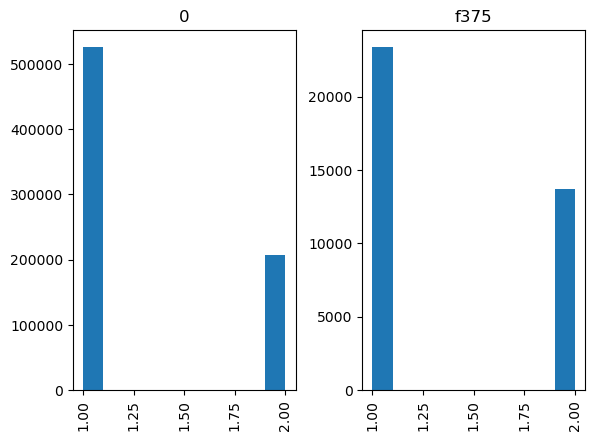

In [64]:
import matplotlib.pyplot as plt
for f in ['f375', 'f376']:
    if f in X.columns:
        X[f].hist(by=y, bins=10)
        plt.title(f)
        plt.show()

In [65]:
subcat_onehots = [f"f{idx}" for idx in range(237, 310) if f"f{idx}" in X.columns]
X['num_offer_subcats'] = X[subcat_onehots].sum(axis=1)
X_test['num_offer_subcats'] = X_test[subcat_onehots].sum(axis=1)

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3248789408.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['num_offer_subcats'] = X[subcat_onehots].sum(axis=1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\3248789408.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['num_offer_subcats'] = X_test[subcat_onehots].sum(axis=1)


In [66]:
# Use only one as "age" proxy or combine:
X['offer_age_mean'] = X[['f351','f352','f353']].mean(axis=1)
X_test['offer_age_mean'] = X_test[['f351','f352','f353']].mean(axis=1)

C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\70831715.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['offer_age_mean'] = X[['f351','f352','f353']].mean(axis=1)
C:\Users\arpit\AppData\Local\Temp\ipykernel_25196\70831715.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['offer_age_mean'] = X_test[['f351','f352','f353']].mean(axis=1)


In [67]:
if 'f376' in X.columns:
    X['discount_bin'] = pd.qcut(X['f376'], q=4, duplicates="drop", labels=False)
if 'f376' in X_test.columns:
    X_test['discount_bin'] = pd.qcut(X_test['f376'], q=4, duplicates="drop", labels=False)

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 368 entries, id4 to offer_age_mean
dtypes: float64(350), int64(18)
memory usage: 2.1 GB


In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369301 entries, 0 to 369300
Columns: 368 entries, id4 to offer_age_mean
dtypes: float64(350), int64(18)
memory usage: 1.0 GB


In [76]:
Column_to_drop.extend([f"f{idx}" for idx in range(237, 310) if f"f{idx}"])

In [71]:
Column_to_drop.extend(['f351','f352','f353'])

In [72]:
id_cols = ['id1', 'id2', 'id3', 'id5'] 

train_ids = train[id_cols].copy()
test_ids = test[id_cols].copy()

In [74]:
Column_to_drop.extend(['f1', 'f2', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27'])

In [75]:
Column_to_drop

['f59',
 'f68',
 'f60',
 'f69',
 'f65',
 'f74',
 'f310',
 'f311',
 'f312',
 'f314',
 'f319',
 'f317',
 'f324',
 'f322',
 'f39',
 'f40',
 'f41',
 'f163',
 'f164',
 'f169',
 'f158',
 'f179',
 'f226',
 'f227',
 'f228',
 'f229',
 'f230',
 'f231',
 'f232',
 'f233',
 'f168',
 'f349',
 'f149',
 'f146',
 '199',
 'f200',
 'f365',
 'f237',
 'f238',
 'f239',
 'f240',
 'f241',
 'f242',
 'f243',
 'f244',
 'f245',
 'f246',
 'f247',
 'f248',
 'f249',
 'f250',
 'f251',
 'f252',
 'f253',
 'f254',
 'f255',
 'f256',
 'f257',
 'f258',
 'f259',
 'f260',
 'f261',
 'f262',
 'f263',
 'f264',
 'f265',
 'f266',
 'f267',
 'f268',
 'f269',
 'f270',
 'f271',
 'f272',
 'f273',
 'f274',
 'f275',
 'f276',
 'f277',
 'f278',
 'f279',
 'f280',
 'f281',
 'f282',
 'f283',
 'f284',
 'f285',
 'f286',
 'f287',
 'f288',
 'f289',
 'f290',
 'f291',
 'f292',
 'f293',
 'f294',
 'f295',
 'f296',
 'f297',
 'f298',
 'f299',
 'f300',
 'f301',
 'f302',
 'f303',
 'f304',
 'f305',
 'f306',
 'f307',
 'f308',
 'f309',
 'f351',
 'f352',
 '

In [77]:
Column_to_drop = list(set(Column_to_drop))

In [79]:
X_clean = X.drop(columns=[col for col in Column_to_drop if col in X.columns])

In [80]:
X_test_clean = X_test.drop(columns=[col for col in Column_to_drop if col in X_test.columns])

In [81]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 240 entries, id4 to offer_age_mean
dtypes: float64(223), int64(17)
memory usage: 1.4 GB


In [82]:
X_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369301 entries, 0 to 369300
Columns: 240 entries, id4 to offer_age_mean
dtypes: float64(223), int64(17)
memory usage: 676.2 MB


In [83]:
X_with_ids = pd.concat([train_ids.reset_index(drop=True), X_clean.reset_index(drop=True)], axis=1)
X_test_with_ids = pd.concat([test_ids.reset_index(drop=True), X_test_clean.reset_index(drop=True)], axis=1)

In [84]:
X_with_ids['y'] = train['y']

In [85]:
X_with_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 245 entries, id1 to y
dtypes: float64(223), int64(20), object(2)
memory usage: 1.4+ GB


In [86]:
X_test_with_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369301 entries, 0 to 369300
Columns: 244 entries, id1 to offer_age_mean
dtypes: float64(223), int64(19), object(2)
memory usage: 687.5+ MB


In [87]:
X_with_ids.to_csv("Featured_train.csv")

In [88]:
X_test_with_ids.to_csv("Featured_test.csv")